<img src="https://assets.holidaycottages.co.uk/assets/images/blog/PixelBritain/Design_V1-03_Borough%20Market.gif" style="text-align:center;">

<h1 style="text-align:center;">London Real Estate - Rent Analysis</h1>
<h3 style="text-align:center;">Find the flat that better fit your needs</h3>
<h4 style="text-align:center;">Location based Clustering</h4>
<h5 style="text-align:center;">30th November 2019</h5>

---

<h2 style="text-align:center;">  Federico Sciuca</h2>

<h4 style="text-align:center;"><a href="https://www.linkedin.com/in/federico-sciuca/"><img src="https://cdn2.iconfinder.com/data/icons/popular-social-media-flat/48/Popular_Social_Media-22-512.png" style="text-align:left; position: relative; top: 15px; left: 1px;" height="45" width="45">   Contact me on LinkedIn</a></h4>

---

<h2 style="text-align:center;">Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Executive Summary</a>

2. <a href="#item2">Introduction and Business problem presentation</a>

3. <a href="#item3">Methodology</a>

4. <a href="#item4">Results</a>

5. <a href="#item5">Let's start the analysis!</a>
    
    1. <a href="#item5">Libraries installation and data collection</a>
    2. <a href="#item6">Data Exploration</a>
    3. <a href="#item7">Data Manipulation</a>
    5. <a href="#item8">Foursquare API - Find the most common venues near the flat</a>
    6. <a href="#item9">Clustering using K-Means Algorithm</a>
    7. <a href="#item10">London Clusters Distribution Map</a>
    8. <a href="#item11">Housing market - heating map</a>
    

6. <a href="#item12">The Final Input: find your best offer!</a>

7. <a href="#item13">Conclusion</a>
</font>
</div>

<a id='item1'></a>

## Executive Summary

This is not the end of the study path but just the start!  
As an analyst, I'm interested in finding new insight to understand a certain phenomenon but as a marketer, I also have a client-centric vision of the businesses and one of the powerful ways to make business is implementing solutions that permit the user to make his/her decision fast and easy.  
  
Everything that saves time and efforts to the user has a great value on the market.  
  
__*Empowering people to make an informed decision is a great way to improve the world we're living in.*__

  <a id='item2'></a>

## Introduction and Business problem presentation

We could identify 3 main reasons why a flat doesn't fit the customer needs:  
  
 - The flat looks old and stale  
 - The neighbour hasn't the expected commodities nearby  
 - The price is too high for that particular flat or out of budget    
      
Our goal with this Notebook is to have a systematic way to analyze the offers posted by RightMove.co.uk to produce a map of the best opportunities in the city.  
If you are looking for a new flat and you like your actual neighbour, we can provide you with a list of all the opportunity on the market.  
  
For this project, I'm going to create a simple software that scrape the website RightMove to collect an updated list of flat for rent, analyze each offer using Foursquare and cluster them to divide the housing market in 20 groups with similar neighbours.

<img src="https://www.trzcacak.rs/myfile/detail/152-1527787_international-appe-rotation-london-skyline-silhouette-png.png" style="text-align:center;">

  <a id='item3'></a>

## Methodology

For this particular analysis, we are going to collect updated data from __RightMove.co.uk__.  
  
To do so, I decided to spend time developing a __web scraping__ application using __*Beautiful Soup 4*__, but then I discovered a repository on __GitHub__ offered by __*toby-p*__ and available <a href="https://github.com/toby-p/rightmove_webscraper.py"><img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" style="text-align:left; position: relative; top: 5px; left: 1px;" height="25" width="25"> here</a>, that's provide a easy way to scrape RightMove!  
  
This script collect the following data:  
  
 - price  
 - type  
 - address  
 - url  
 - agent_url  
 - postcode  
 - number_bedrooms  
 - search_date  
   
   
A record will look like the following:  
  
| id | price | type | address | url | agent_url | postcode | number_bedrooms | search_date |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 2210.0 | 2 bedroom terraced house | Lifford Street, SW15 |  http://www.rightmove.co.uk/property-to-rent/pr... | http://www.rightmove.co.uk/estate-agents/agent... | SW15 | 2.0 | 2019-11-30 20:53:29.597998 |   
  
__The address__ is in the format *"Street, City, Postcode"* and is an __unstructured field__ but for our purpose, we can leave as it is. Instead, the __PostCode__ present a *"limited"* format because we have the first two/three digits only. __This is not accurate enough to collect meaningful data about the venues around the flat__.  
  
In order __to solve this problem__, we are going to use <a href="https://opencagedata.com/">OpenCage Geocoder API</a> to *look up coordinates from a postal address*. This is a case when an unstructured field becomes helpful.  
  
To __associate each rent offer to a District__, we are going to __join the data table with a second dataset__ presenting two columns:  
  
 - District Name  
 - PostCode  
  
This dataset had been created __scraping a Wikipedia Table__ (available<a href="https://en.wikipedia.org/wiki/London_postal_district"> here</a>) with the data we need for the exercise.  

When the data are collected and merged into a single data frame, we are going to __cluster__ them using the __K-Means algorithm__ to divide the market into *20 different clusters*.
To have an idea of the distribution on the territory of the offers, I plotted __2 meaningful maps__:  
  
 - Cluster map: this map shows the distribution of the clusters using colours to identify each cluster.  
 - Heating map: this map shows the areas with a higher number of offers.  
  
To better understand the market, I decided to develop some __bar plots__ to easily identify the __average price for a studio flat, 1 bedroom flat and 2 bedroom flat grouped by the District Name__.  
I've also plotted a __correlation matrix__ to identify if there are strong unexpected correlations between features in the dataset. 
  
Finally, __I decided to conclude the project by asking the user to insert some data:__  
  
 - Your address: this input is used to analyze the neighbourhood you are living in and to use this information to find the cluster you belong to.  
 - The number of bedrooms you are looking for: this input is used to filter the results of the cluster you belong to.  
  
__*This part of the analysis has as output a data frame with a list of filtered results based on your preference.*__

<a id='item4'></a>

## Results

As expected, the __price of a flat can't be forecast based on the venues around it only__ and there is, of course, a strong correlation between the number of bedrooms and price. *Nevertheless, is possible to develop a prediction model to take in consideration not only the characteristics of the flat but also the District the flat belongs to and the presence of some key venues near the flat.*  
An example of __key factors__ could be the presence of __supermarkets with high reputation__, __a public transport stop__, __schools or Universities__, __Hospital__. The __correlation__ between price and these categories __is low but still important to the final users__.  
  
The __goal of this notebook__ is to provide to everyone a way to scrape the housing market and __identify the best offers that fit the user's personal needs__. Providing an ideal address and the number of bedrooms the user is looking for, he/she can easily understand which area of London is the best for his/her next step.

<a id='item5'></a>

---
<h2 style="text-align:center;">Let's Start!</h2>  


## Libraries Installation

First of all we need to install all the libraries we need for the analysis.

In [2]:
# Get lxlm
!conda install -c anaconda lxml -y

# Install requests library
!conda install -c anaconda requests -y

# Install geopy library
!conda install -c conda-forge geopy --yes 

# Install folium library
!conda install -c conda-forge folium=0.5.0 --yes

# Install rightmove-webscraper (https://github.com/toby-p/rightmove_webscraper.py)
!pip install -U rightmove-webscraper

# Install opencage
!pip install opencage

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB  anaconda

The following packages will be UPDATED:

    certifi: 2019.11.28-py36_0 conda-forge --> 2019.11.28-py36_0 anaconda
    openssl: 1.1.1d-h516909a_0 conda-forge --> 1.1.1-h7b6447c_0  anaconda


certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version

Let's import the libraries into the Jupyter Notebook

In [3]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import requests
import lxml
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import folium # plotting library
from sklearn.cluster import KMeans

from opencage.geocoder import OpenCageGeocode
from pprint import pprint

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Run the rightmove_webscraping to collect data  
  
Note: rightmove_webscraper works with an old version of numpy. For this reason I'll use rightmove_webscraper first and then I'll reinstall the last version which works without conflicts with seaborn.

In [4]:
from rightmove_webscraper import RightmoveData

url = "https://www.rightmove.co.uk/property-to-rent/find.html?searchType=RENT&locationIdentifier=REGION%5E87490&insId=1&radius=0.0&minPrice=&maxPrice=&minBedrooms=&maxBedrooms=&displayPropertyType=&maxDaysSinceAdded=&sortByPriceDescending=&_includeLetAgreed=on&primaryDisplayPropertyType=&secondaryDisplayPropertyType=&oldDisplayPropertyType=&oldPrimaryDisplayPropertyType=&letType=&letFurnishType=&houseFlatShare="
rmd = RightmoveData(url)

The results from the webscraping is a Pandas DataFrame but in order to avoid any accidental lose of data, __I prefer to copy it in a new Pandas DataFrame.__

In [5]:
df_rm = pd.DataFrame(rmd.get_results)

In [6]:
# Additional imports for analysis:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
print(df_rm.shape)
df_rm.head(3)

(1050, 8)


,price,type,address,url,agent_url,postcode,number_bedrooms,search_date
0,5265,3 bedroom maisonette,"Abingdon Road, High Street Kensington, London W8",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W8,3.0,2019-12-04 19:53:51.373561
1,1500,1 bedroom apartment,"Askew Road, London, W12",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W12,1.0,2019-12-04 19:53:51.373561
2,1278,Studio flat,"Montagu Row, Marylebone, London W1U",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W1U,0.0,2019-12-04 19:53:51.373561


Now let's reinstall and update numpy and seaborn to avoid conflicts during the next steps.

In [8]:
!pip install --upgrade numpy
!pip install --upgrade seaborn

     |████████████████████████████████| 20.0MB 477kB/s eta 0:00:011    |███████████████▋                | 9.7MB 15.3MB/s eta 0:00:01
ERROR: mkl-random 1.0.1 requires cython, which is not installed.
ERROR: rightmove-webscraper 1.0 has requirement numpy==1.17.2, but you'll have numpy 1.17.4 which is incompatible.
  Found existing installation: numpy 1.17.2
    Uninstalling numpy-1.17.2:
      Successfully uninstalled numpy-1.17.2
Requirement already up-to-date: seaborn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.9.0)


<a id='item6'></a>

## Data Exploration

We can take a look at the raw data and visualize some distributions to better understand how the market is divided.  
We are going to __plot a bar chart__ that shows the __number of offers listed by the number of bedrooms__.

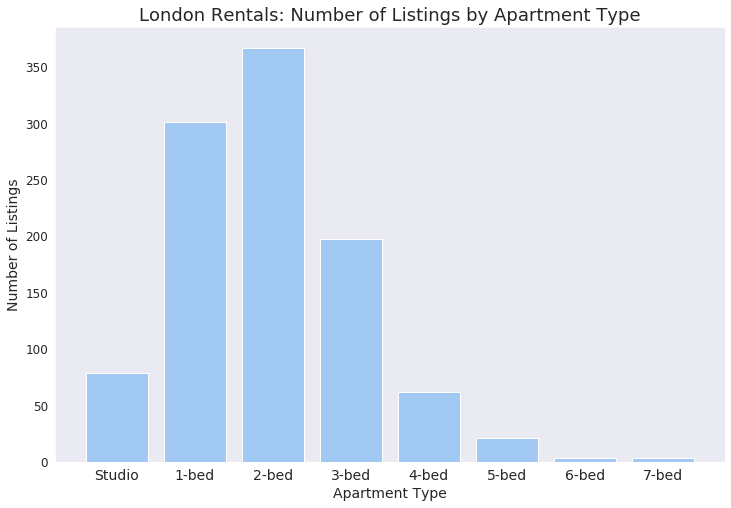

In [9]:
import seaborn as sns
def plot_by_type(rmd: RightmoveData):
    """Bar chart of count of results by number of bedrooms."""
    df = rmd.summary()
    labels = [f"{i}-bed" if i != 0 else "Studio" for i in df["number_bedrooms"]]
    x = df.index
    y = df["count"]
    sns.set_style("dark")
    sns.set_palette(sns.color_palette("pastel"))
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title("London Rentals: Number of Listings by Apartment Type", size = 18)
    plt.xlabel("Apartment Type", size = 14)
    plt.ylabel("Number of Listings", size = 14)
    plt.xticks(size = 14)
    plt.yticks(size = 12)
    plt.bar(x, y, tick_label=labels)
    plt.savefig('London Rentals_Number of Listings by Apartment Type.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_by_type(rmd)


As we can see, the __most frequent__ offers on the market are about __2 bedrooms apartments__ and __1 bedroom apartment__.  
  
*Where are the most offers located by postcode?*  
We can plot a new __bar chart to explore the distribution of offers by postcode__.

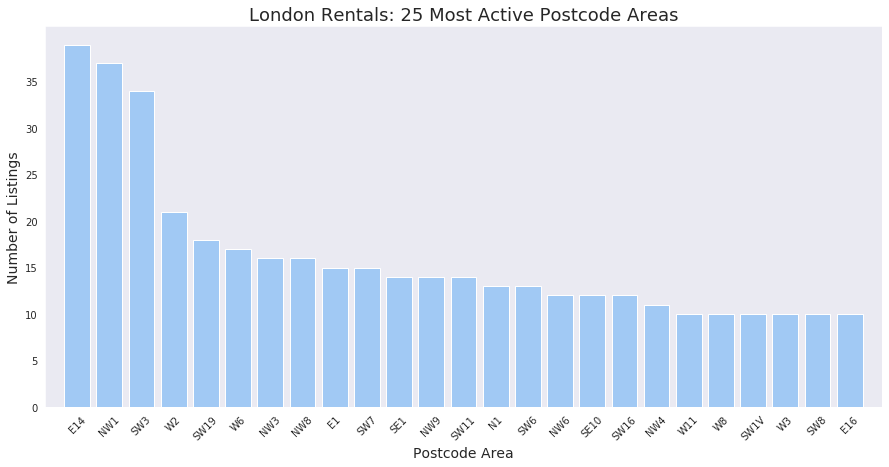

In [10]:
def plot_by_postcode(rmd: RightmoveData, number_to_plot: int = 25):
    """Plot count of results by postcode."""
    df = rmd.summary("postcode")
    df.sort_values(by="count", ascending=False, inplace=True)
    df = df.reset_index(drop=True)[:number_to_plot]
    x, y = df["postcode"], df["count"]
    ymax = ((df["count"].max() // 5) + 1) * 5
    sns.set_palette(sns.color_palette("pastel"))
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.bar(x.index, height=y)
    ax.set_title(f"London Rentals: {number_to_plot} Most Active Postcode Areas", size=18)
    ax.set_xlabel("Postcode Area", size=14)
    ax.set_ylabel("Number of Listings", size=14)
    ax.set_xticks(x.index)
    ax.set_xlim(-1, x.index[-1]+1)
    ax.set_xticklabels(x.values, rotation=45)
    ax.set_yticks(range(0, ymax, 5))
    plt.savefig('Most Active Postcode Areas.png', dpi=300, bbox_inches='tight')
    return fig

f = plot_by_postcode(rmd, number_to_plot=25)

<a id='item7'></a>

## Data Manipulation

In order to make the results easier to read and interpret, I decided to __join each postcode to the District Name__.  
This step is of __primary importance to make the results enjoyable to the final user__.  
  
First of all __I scraped the Wikipedia Table__ using __Beautiful Soup 4__ and I saved the result as a CSV.
To make this Jupyter Notebook shorter, *I'll not include the code used to scrape the table* but I'm going to __open the CSV file as a DataFrame__ and work directly on it.

In [11]:
# Open the csv file and save it as a Pandas DataFrame
df_districts = pd.read_csv("London Districts.csv")

In [12]:
#df_rm = pd.DataFrame(df_rm)

In [13]:
# Rename the column "postcode" to match the column name of the df_districts
df_rm.rename(columns = {"postcode":"PostCode"}, inplace=True)

In [14]:
df_rm.shape

(1050, 8)

In order to expand the information dataset relative to each flat on the market, we are going to use OpenCageData. This API permits to search and grab geographical information based on latitude and longitude or address. We are going to use the postcode of each District to expand our dataframe.

In [15]:
# Extract the postcode column to process it through OpenCageData to find latitude and longitude of each postcode
postal_codes = df_districts["PostCode"]

Use the list of Postcodes to expand the DataFrame with the latitude and longitude location.

In [16]:
import json

latitudes = [] # Initializing the latitude array
longitudes = [] # Initializing the longitude array

for postal_code in postal_codes : 
    place_name = postal_code + " London" # Formats the place name
    url = 'https://api.opencagedata.com/geocode/v1/json?q={}&key={}'.format(place_name, "YOUR KEY HERE") # Gets the proper url to make the API call
    obj = json.loads(requests.get(url).text) # Loads the JSON file in the form of a python dictionary
    
    results = obj['results'] # Extracts the results information out of the JSON file
    lat = results[0]['geometry']['lat'] # Extracts the latitude value
    lng = results[0]['geometry']['lng'] # Extracts the longitude value
    
    latitudes.append(lat) # Appending to the list of latitudes
    longitudes.append(lng) # Appending to the list of longitudes

In [17]:
df_districts['Latitude'] = latitudes
df_districts['Longitude'] = longitudes
df_districts.head()

,PostCode,District Name,Latitude,Longitude
0,E1,Eastern Head district,51.489334,-0.144055
1,E2,Bethnal Green,51.489334,-0.144055
2,E3,Bow,51.514947,-0.093046
3,E4,Chingford,51.507322,-0.127647
4,E5,Clapton,51.514947,-0.093046


Having the latitude and longitude of each district could be useful for future and more in-depth analysis.

However, for this project, it is essential to expand our database by __associating each apartment with its geographical coordinates__.

## Using OpenCage to expand the record of each flat  
  
We can do the same process to expand the information related to each flat. OpenCage Data can be used to collect geographical information searching by address.  
  
In order to have enough data to work with, is better to collect the following geographic information:  
  
 - latitude  
 - longitude  
 - county  
 - complete postcode  
 - state district  
 - suburb  

However, during the analysis, I discovered that not all the data are available for every address in the data frame. This fact limited a bit the analysis we could do but it doesn't prevent us to achieve our goal to develop a new way to cluster the housing market by similarity.  
  
The dataset we have looks like the following:

In [18]:
df_rm_lat_long = df_rm
df_rm_address = df_rm_lat_long["address"]

In [19]:
# Set the OpenCageGeocode requirements:
key = 'YOUR KEY HERE'
geocoder = OpenCageGeocode(key)

In [20]:
# Create a new empty dataframe with the columns that are important for our purpose
df_info = pd.DataFrame(columns = ["i", "address", "Latitude_a", "Longitude_a", "county", "Postcode_complete", "state_district", "suburb"])

In [21]:
# Define some empty list
lat_list = []
lng_list = []
county_list = []
postcode_complete_list = []
state_district_list = []
suburb_list = []
address_list = []

# Create a loop to find and store the data for each address.
for i in range(0, len(df_rm["address"])):
    address = df_rm["address"][i]
    query = u'{}'.format(address)
    results = geocoder.geocode(query)

    # In order to avoid errors, define an if-else statement to insert 'np.nan' when the 'results' variable is blank or some of the results are missing
    if not results:
        address_ = df_rm["address"][i]
        lat_ = np.nan
        lng_ = np.nan
        county_ = np.nan
        postcode_complete = np.nan
        state_district = np.nan
        suburb = np.nan
    
    else:
        address_ = df_rm["address"][i]

        if 'lat' in results[0]['geometry']:
            lat_ = results[0]['geometry']['lat']
        else:
            lat_ = np.nan

        if 'lng' in results[0]['geometry']:
            lng_ = results[0]['geometry']['lng']
        else:
            lng_ = np.nan

        if 'county' in results[0]['components']:
            county_ = results[0]['components']['county']
        else:
            county_ = np.nan

        if 'postcode' in results[0]['components']:
            postcode_complete = results[0]['components']['postcode']
        else:
            postcode_complete = np.nan

        if 'state_district' in results[0]['components']:
            state_district = results[0]['components']['state_district']
        else:
            state_district = np.nan

        if 'suburb' in results[0]['components']:
            suburb = results[0]['components']['suburb']
        else:
            suburb = np.nan

        lat_list.append(lat_)
        lng_list.append(lng_)
        county_list.append(county_)
        postcode_complete_list.append(postcode_complete)
        state_district_list.append(state_district)
        suburb_list.append(suburb)
        address_list.append(address_)
        
        #(columns = ["i", "address", "Latitude_a", "Longitude_a", "county", "Postcode_complete", "state_district", "suburb"])
        df_info = df_info.append(pd.Series([i, address_, lat_, lng_, county_, postcode_complete, state_district, suburb], index=df_info.columns), ignore_index = True)

In [22]:
print(df_info.shape)
df_info.head(3)

(1033, 8)


,i,address,Latitude_a,Longitude_a,county,Postcode_complete,state_district,suburb
0,0,"Abingdon Road, High Street Kensington, London W8",51.501600,-0.213300,NaN,W8,NaN,NaN
1,1,"Askew Road, London, W12",51.505232,-0.244442,London Borough of Hammersmith and Fulham,W12 9HD,Greater London,Brook Green
2,2,"Montagu Row, Marylebone, London W1U",51.508500,-0.125700,NaN,W1U,NaN,NaN


As you can see 13 flats are missing. It normally happens when the address is not correctly defined.  
  
In order to properly match the new DataFrame to the original set of data, I defined the column "i" that is equal to the index values of each record from the original DataSet. 

In [23]:
df_info = df_info.set_index('i')

Now it's time to __merge the data frames__. I'll merge the *df_districts and df_rm on Postcode*. In this way I'll have a match between postcode and district name.  
  
Then I'll merge the *df_merged with the new df_info*.  
In this way I'll have available for each flat on the market as many location information as possible.  
  
__*I'll drop the "state district" column because it doesn't add any further information*__.

After the merging operation, the new data frame looks like the following:

In [24]:
df_merged = df_rm.merge(df_districts, how='left', on="PostCode")

To be sure that each address has been merged with the correct series of new information, I used the 'i' column as double check.  
This solution permitted me to double-check that the previous index matched the new index, this means that I dropped the records that have not now information.

In [25]:
print(df_merged.shape)
df_merged.head(3)

(1050, 11)


,price,type,address,url,agent_url,PostCode,number_bedrooms,search_date,District Name,Latitude,Longitude
0,5265,3 bedroom maisonette,"Abingdon Road, High Street Kensington, London W8",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W8,3.0,2019-12-04 19:53:51.373561,Kensington,51.507322,-0.127647
1,1500,1 bedroom apartment,"Askew Road, London, W12",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W12,1.0,2019-12-04 19:53:51.373561,Shepherds Bush,51.507322,-0.127647
2,1278,Studio flat,"Montagu Row, Marylebone, London W1U",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W1U,0.0,2019-12-04 19:53:51.373561,NaN,NaN,NaN


In [26]:
# I realized that i need the columns "i" from the df_info and the column "index" from the df_merged. 
df_merged = df_merged.reset_index()
df_merged.rename(columns = {"index" : "i"}, inplace = True)
df_info = df_info.reset_index()

In [27]:
# Just to be sure, I'll save a copy of the datasets
df_merged_copy = df_merged
df_info_copy = df_info

In [28]:
df_location = df_merged_copy.merge(df_info_copy, how='outer', on=["i"])

In [29]:
print(df_location.shape)
df_location.tail(3)

(1050, 19)


,i,price,type,address_x,url,agent_url,PostCode,number_bedrooms,search_date,District Name,Latitude,Longitude,address_y,Latitude_a,Longitude_a,county,Postcode_complete,state_district,suburb
1047,1047,1500,2 bedroom flat,"Morgan Estate, Richmond Road, London Fields, E8",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,E8,2.0,2019-12-04 19:53:51.373561,Hackney,51.514947,-0.093046,"Morgan Estate, Richmond Road, London Fields, E8",-38.164800,176.912840,NaN,NaN,NaN,NaN
1048,1048,6686,3 bedroom penthouse,"Palace Wharf Apartments, W6",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W6,3.0,2019-12-04 19:53:51.373561,Hammersmith,51.507322,-0.127647,"Palace Wharf Apartments, W6",-0.611790,30.555730,NaN,NaN,NaN,NaN
1049,1049,3142,3 bedroom flat,"Gatliff Road, London, Greater London, SW1W",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SW1W,3.0,2019-12-04 19:53:51.373561,NaN,NaN,NaN,"Gatliff Road, London, Greater London, SW1W",51.487842,-0.149855,Westminster,SW1W 8QG,Greater London,Pimlico


As you can see, now we have the original DataFrame expanded.  
  
What we have added:  
  
 - __District Name__
 - __Latitude__ *and* __Longitude__: lat and lng of the "District Name"
 - __Address_y__: a copy of the original address that we'll drop. I used it to be sure that the DataFrames have been merged correctly
 - __Latitude_a__ *and* __Longitude_a__: lat and lng of the flat.
 - __County__
 - __Postcode_complete__: an extension of the original PostCode
 - __State_district__
 - __suburb__
  


<a id='item8'></a>

## Foursquare API - Find the most common venues near the flat

### Collect meaningful information about the most common venues around each flat.  
  
This step is crucial to develop a good __clustering K-Means model__.  
  
We are going to use the __Foursquare API__ to collect the __first 100 venues__ in a __radius of 500 meters around each flat posted on RightMove__.  

In [30]:
# Take a copy of the dataset to be sure we don't lose any data
df_clustering = df_location

As we can see, there are a total of 1050 records in our dataset and 953 unique address.

In [31]:
df_clustering.T.apply(lambda x: x.nunique(), axis=1)

i                    1050
price                 324
type                   72
address_x             940
url                  1046
agent_url             570
PostCode              135
number_bedrooms         8
search_date             1
District Name         101
Latitude               26
Longitude              26
address_y             924
Latitude_a            745
Longitude_a           743
county                 87
Postcode_complete     623
state_district          8
suburb                214
dtype: int64

To be sure that the code run smoothly during the analysis, is better to __drop__ all the __rows that have a Null value__ in one of the columns __"Latitude_a" or "Longitude_a" or both__ using the following code.

In [32]:
# Drop rows with Longitude_a or Latitude_a = np.nan
df_clustering.dropna(subset=['Latitude_a', 'Longitude_a'], inplace=True)
print(df_clustering.shape)
df_clustering.rename(columns={"level_0" : "i-match"}, inplace=True)
df_clustering.reset_index()
df_clustering.head(3)

#Note: I'm saving the columns level_0, i, i_match, address_x and address_y to have a way to double-check all the data manipulation. After I'm sure that everything is correct, I'll drop them.

(1033, 19)


,i,price,type,address_x,url,agent_url,PostCode,number_bedrooms,search_date,District Name,Latitude,Longitude,address_y,Latitude_a,Longitude_a,county,Postcode_complete,state_district,suburb
0,0,5265,3 bedroom maisonette,"Abingdon Road, High Street Kensington, London W8",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W8,3.0,2019-12-04 19:53:51.373561,Kensington,51.507322,-0.127647,"Abingdon Road, High Street Kensington, London W8",51.501600,-0.213300,NaN,W8,NaN,NaN
1,1,1500,1 bedroom apartment,"Askew Road, London, W12",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W12,1.0,2019-12-04 19:53:51.373561,Shepherds Bush,51.507322,-0.127647,"Askew Road, London, W12",51.505232,-0.244442,London Borough of Hammersmith and Fulham,W12 9HD,Greater London,Brook Green
2,2,1278,Studio flat,"Montagu Row, Marylebone, London W1U",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W1U,0.0,2019-12-04 19:53:51.373561,NaN,NaN,NaN,"Montagu Row, Marylebone, London W1U",51.508500,-0.125700,NaN,W1U,NaN,NaN


Now it's time to define the setting variables for __the Foursquare API__ in order to __collect the information__ we need to develop a __clustering analysis__.

### Address and Venues  
  
The process of collecting the venues around each flat is fundamental to develop a clustering analysis.  
the following are the number of venues I collected for the first three record of the dataset:

In [33]:
CLIENT_ID = 'YOUR CLIENT ID HERE' # your Foursquare ID
CLIENT_SECRET = 'YOUR SECRET KEY HERE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B5KWWDFHTON23TDXFR2TXATYBJQMYXICEEJWOSTX2YIAUZIC
CLIENT_SECRET:FVZXWADC3JUKZKIMRC40LFNTRSHC51MDTVKWHF4IJMGXTDC5


In [34]:
def getNearbyVenues(names, latitudes, longitudes, i, price, types, radius = 500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng, i, price, types in zip(names, latitudes, longitudes, i, price, types):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        if (lat != np.nan) and (lng != np.nan):
            
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng,
                i,
                price,
                types,
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['address_x', 
                                      'address Latitude', 
                                      'address Longitude',
                                      'i',
                                      'price',
                                      'type',
                                      'Venue', 
                                      'Venue Latitude', 
                                      'Venue Longitude', 
                                      'Venue Category']
        else:
            continue
    
    return(nearby_venues)

This step sometimes need to be run again and again. For some reasons it doesn't run smoothly at the first go. 

In [35]:
df_address_venues = getNearbyVenues(names = df_clustering['address_x'],
                                   latitudes = df_clustering['Latitude_a'],
                                   longitudes = df_clustering['Longitude_a'],
                                   i = df_clustering['i'],
                                   price = df_clustering['price'],
                                   types = df_clustering['type']
                                  )

Abingdon Road, High Street Kensington, London W8
Askew Road, London, W12
Montagu Row, Marylebone, London W1U
Granville Square, London, WC1X
Candida Court, Clarence Way, London, NW1
Thorold Road, London, N22
Ravenstone Road, Wood Green, London, N8
Rutherford Street, Westminster, London, SW1P
Tregunter Road, Chelsea, London, SW10
Falcon Wharf, Battersea, London, SW11
Takhar Mews, Clapham Junction, London, SW11
Ebury Street, Belgravia, London, SW1W
Cheyne Place, Chelsea, London, SW3
Kingswood Road, London, SW2
Bethune Road, London, N16
The Residence, 10 Charles Clowes Walk, London, SW11
Britton Street, Clerkenwell, London, EC1M
Britton Street, Clerkenwell, London, EC1M
The Landmark, Canary Wharf, London, E14
Alexandra Road, SW19
Kensington High Street, High Street Kensington, London, W14
Oxford Gardens, North Kensington, London, W10
Sovereign Close, Ealing, London, W5
Jarrow Way, Homerton, London, E9
Clifden Mews, Clapton, London, E5
Becklow Road, London, W12
Abbey Road, West Hampstead, L

In [36]:
#df_clustering.loc[df_clustering['address_x'] == 'Munster Road, Fulham']

In [37]:
#df_clustering.loc[192]

Now that we have collected data about each flat let's check how many venues we have found by address

In [ ]:
df_address_venues.groupby(['address_x', 'i', 'price', 'type']).count().head(3)

Working with categorical variables don't permit to explore mean or develop other distribution analysis because it doesn't make sense. This means that in order to find the most frequent venue category, is important to transform the venues in dummies variables.  
After that, is better to reorganize the dataset.
The new dataset have a record for each venue category related to each flat (this means that each row has one "1" only out of 425 venues category). For this reason the shape of the table is the following:

In [39]:
print("There are " , len(df_address_venues["Venue Category"].unique()), " unique categories in the dataset")

There are  439  unique categories in the dataset


To be clear, I first get dummies and then reorganize the columns order

In [40]:
# one hot encoding
df_venues_dummies = pd.get_dummies(df_address_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
df_venues_dummies['address'] = df_address_venues['address_x']
df_venues_dummies['i'] = df_address_venues['i']
df_venues_dummies['price'] = df_address_venues['price']
df_venues_dummies['type'] = df_address_venues['type']

# move address column to the first column
temp_address = df_venues_dummies['address']
df_venues_dummies.drop(labels=['address'], axis=1,inplace = True)
df_venues_dummies.insert(0, 'address', temp_address)

# move i column to the second column
temp_i = df_venues_dummies['i']
df_venues_dummies.drop(labels=['i'], axis=1,inplace = True)
df_venues_dummies.insert(1, 'i', temp_i)

# move price column to the third column
temp_price = df_venues_dummies['price']
df_venues_dummies.drop(labels=['price'], axis=1,inplace = True)
df_venues_dummies.insert(2, 'price', temp_price)

# move type column to the fourth column
temp_type = df_venues_dummies['type']
df_venues_dummies.drop(labels=['type'], axis=1,inplace = True)
df_venues_dummies.insert(3, 'type', temp_type)

Now our dataset has the following shape:

In [41]:
df_venues_dummies.shape

(44637, 443)

Group the data by 'address', 'i', 'price' and 'type'

In [42]:
df_dcategories = df_venues_dummies.groupby(['address', 'i', 'price', 'type']).mean().reset_index()

In the direction of creating a more useful dataset, we need to group the data by 'address', 'i', 'price' and 'type'.  
In this way, we can see that the resulting shape of the table is:

In [43]:
df_dcategories.shape

(1000, 443)

To make the analysis faster and tinier, we are going to find the top 20 most common venues that will be used to develop the clustering analysis.  
  
Finally we have a dataset ready to be used for our purpose!

In [44]:
# Create a dataframe with the top 20 venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['address', 'i', 'price', 'type']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
address_venues_sorted = pd.DataFrame(columns=columns)
address_venues_sorted['address'] = df_dcategories['address']
address_venues_sorted['i'] = df_dcategories['i']
address_venues_sorted['price'] = df_dcategories['price']
address_venues_sorted['type'] = df_dcategories['type']

for ind in np.arange(df_dcategories.shape[0]):
    address_venues_sorted.iloc[ind, 4:] = return_most_common_venues(df_dcategories.iloc[ind, 3:], num_top_venues)

address_venues_sorted.head(3)

,address,i,price,type,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,"1 Warminster Road, South norwood, SE15",298,925,1 bedroom flat,Lake,Zoo Exhibit,Flea Market,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flower Shop,Event Space,Food,Food & Drink Shop,Food Court,Food Stand
1,"Hargood Road, Blackheath, London, SE3",1039,2250,4 bedroom terraced house,Bus Stop,Park,Rugby Pitch,Café,Warehouse Store,Zoo Exhibit,Fish Market,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Flower Shop,Flea Market,Exhibit,Food
2,Heathway Court,540,2492,3 bedroom apartment,Park,Zoo Exhibit,Flea Market,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flower Shop,Exhibit,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck


In [46]:
address_venues_sorted.shape

(1000, 24)

In [47]:
i_values = address_venues_sorted['i']

<a id='item9'></a>

## Clustering using K-means

Now that we have all the information we need to divide the market by geographic similarity, it's time to split it in Clusters.  
  
We are going to use the __K-Means algorithm__ for this purpose.  
__K-Means__ clustering is a method of __vector quantization__, originally from signal processing, that is __popular for cluster analysis in data mining__. K-Means clustering aims __to partition n observations into k clusters__ in which __each observation belongs to the cluster with the nearest mean__, serving as a prototype of the cluster.

In [48]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Initially I need to tidy the dataset from the columns that don't contain independents variables.  
For this reason I drop the columns "address", "i", "price" and "type".
Some of these columns could be used for future analysis and in favor of developing a pricing model but in this particular situation, we are just going to perform clustering analysis and location selection.  
  
The table now is ready to be used to train the K-Means algorithm and looks like the following:

In [49]:
df_dcategories_nn = df_dcategories.drop(columns={'address', 'i', 'price', 'type'})
df_dcategories_nn.head(3)

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Chaat Place,Champagne Bar,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Cigkofte Place,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Quad,College Residence Hall,College Science Building,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Community College,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cricket Ground,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Iraqi Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Res

I'm going to save the dataset as a CSV in case I need it in other applications.

In [50]:
df_dcategories_nn.to_csv(path_or_buf='df_dcategries_nn.csv')

There is not a right answer to the question: how many clusters I need?  
For this particular paper I decided to split the dataset in 20 clusters to be sure that small differences between two locations influence the cluster the flat belongs to.

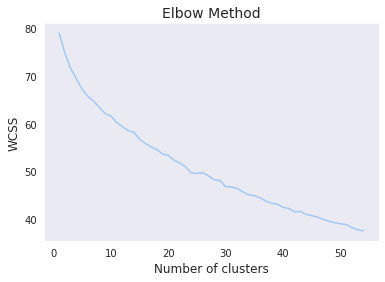

In [51]:
wcss = []
for i in range(1, 55):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_dcategories_nn)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 55), wcss)
plt.title('Elbow Method', size = 14)
plt.xlabel('Number of clusters', size = 12)
plt.ylabel('WCSS', size = 12)
plt.savefig('WCSS.png', dpi=300, bbox_inches='tight')
plt.show()

In [52]:
k_clusters = 20

k_clusters_fit = KMeans(k_clusters, random_state = 4).fit(df_dcategories_nn)

In [53]:
# Extract the clusters labels
k_clusters_fit.labels_

array([11,  6,  8,  1,  2,  1,  4, 15,  2,  1,  5, 15, 19,  0, 19,  1,  5,
        1,  1,  2,  4,  7,  7,  2,  1,  5, 19,  0,  5,  5,  2,  2,  2, 19,
       15,  2,  1,  5,  2,  2,  2, 19,  6, 15, 15, 19,  1,  1,  1, 15,  1,
        2,  4, 15,  6, 19,  5,  1,  6,  1,  2,  1,  1,  0,  2, 15,  6,  2,
        7,  4,  1, 19,  7,  5,  5,  2,  4,  2,  2,  2, 15,  6, 19,  1,  1,
       19,  5,  2, 15, 19, 19,  2,  5,  5,  5,  2,  4,  1,  4,  1,  6,  6,
       15,  5,  7, 15,  1,  2,  2,  2,  2,  1,  5, 15,  2,  6,  4,  2,  7,
       12, 12, 12, 12, 12, 12,  1,  1,  2,  2,  1, 15, 19,  2,  1, 15,  9,
        1,  1,  2,  1,  1,  1,  4, 15,  2, 12,  5,  2, 19,  2,  2,  2,  0,
        5,  5,  5,  2,  7,  2,  2,  2,  5, 16,  4,  5,  4,  4, 19, 19, 15,
       19,  1, 15,  2,  1,  4,  2,  1,  1,  1,  2,  2,  7, 19, 19, 16,  5,
        1,  5,  6,  1, 19,  0, 19,  7,  2,  1, 19,  2,  2, 19,  2,  1,  1,
       19, 19, 19, 15,  2,  9,  9,  1,  5,  4, 10,  2,  1,  5,  2,  2,  2,
        4, 19, 14,  1,  6

In [54]:
# add clustering labels
# df.insert(loc, column_name, values)
address_venues_sorted.insert(0, "Cluster Label", k_clusters_fit.labels_)

In [55]:
# Create a copy of the DataFrame
df_final = df_clustering

df_final = df_final[df_final['i'].isin(i_values)]
df_final.shape

(1000, 19)

In [56]:
# Merge the DataFrames
df_final = df_final.merge(address_venues_sorted, how='outer', on=["i"])

# Convert Cluster Label in integers
df_final["Cluster Label"] = df_final["Cluster Label"].astype(int)

In [57]:
df_final.shape

(1000, 43)

In [58]:
df_final_clean = df_final.drop(columns= ['i', 'PostCode', 'search_date', 'address_y',  'state_district'])

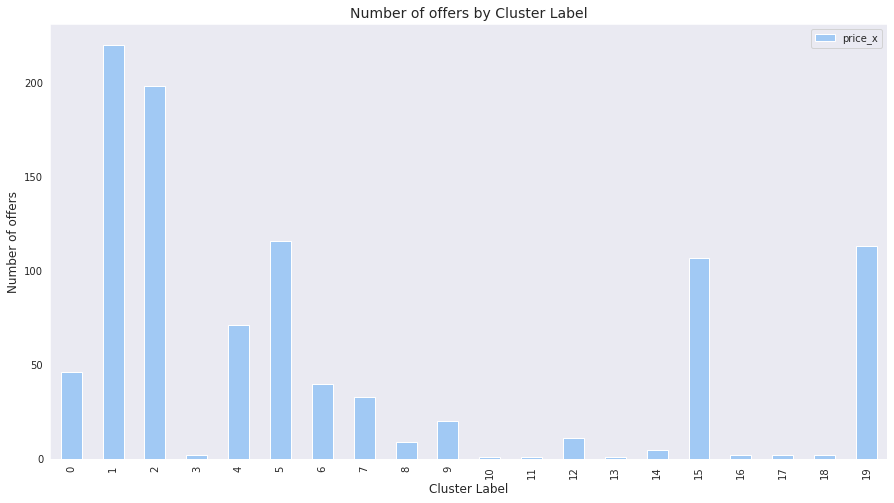

In [59]:
df_plot1 = df_final_clean.groupby(['Cluster Label']).count()

df_plot1.reset_index().plot(x="Cluster Label", y="price_x", kind="bar", figsize=(15,8))
plt.xlabel("Cluster Label", size = 12)
plt.ylabel("Number of offers", size = 12)
plt.title("Number of offers by Cluster Label", size = 14)
plt.savefig('Cluster Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

I'll save the model externally. The reason of this is because initially I divided the Notebook in 4 different parts and files and I needed to import the trained model in a new Notebook.  
I left it in this final version as *"a good things to know how to do"*.

In [60]:
pickle.dump(k_clusters_fit, open("k_clusters_fit.pkl", "wb"))

<a id='item10'></a>

### London Clusters Distribution Map

In [150]:
# London latitude and longitude
latitude = 51.509865
longitude = -0.118092

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final_clean['Latitude_a'], df_final_clean['Longitude_a'], df_final_clean['address_x'], df_final_clean['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters.save("MapClusters.png")  
map_clusters
 

<a id='item11'></a>

### Housing market - heating map

In [147]:
def generateBaseMap(default_location=[latitude, longitude], default_zoom_start=8):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [148]:
from folium.plugins import HeatMap

base_map = generateBaseMap(default_zoom_start = 12)
HeatMap(data=df_final_clean[['Latitude_a', 'Longitude_a', 'price_x']].groupby(['Latitude_a', 'Longitude_a']).mean().reset_index().values.tolist(), radius=12, max_zoom=12).add_to(base_map)


In [151]:
base_map.save("Heating map.png")
base_map


Can I define a input variable asking a user to insert his address and make a prevision about the cluster?

In [65]:
df_final_clean.to_csv(path_or_buf = 'df_clusters_labeled.csv')

In [66]:
print(df_final_clean.groupby(['District Name']).head().shape)
df_final_grouped = df_final_clean.groupby(['District Name', 'type_x']).mean()
df_final_grouped.head(3)

(367, 38)


price_x  number_bedrooms  \
District Name type_x                                                   
Abbey Wood    2 bedroom terraced house  1200.000000              2.0   
Acton         1 bedroom flat            1300.000000              1.0   
              2 bedroom apartment       1733.333333              2.0   

                                         Latitude  Longitude  Latitude_a  \
District Name type_x                                                       
Abbey Wood    2 bedroom terraced house  51.478570   0.118010   51.486900   
Acton         1 bedroom flat            51.507322  -0.127647   51.518537   
              2 bedroom apartment       51.507322  -0.127647   51.509625   

                                        Longitude_a  Cluster Label  \
District Name type_x                                                 
Abbey Wood    2 bedroom terraced house     0.107500            4.0   
Acton         1 bedroom flat              -0.271663            6.0   
              2 bedroom apartment         -0.271126           19.0   

                                            price_y  
District Name type_x                                 
Abbey Wood    2 bedroom terraced house  1200.000000  
Acton         1 bedroom flat            1300.000000  
              2 bedroom apartment       1733.333333

In [67]:
df_2bed = df_final_grouped.loc[df_final_grouped['number_bedrooms'] == 2].sort_values(by=['price_x'])
df_2bed.head()

,,price_x,number_bedrooms,Latitude,Longitude,Latitude_a,Longitude_a,Cluster Label,price_y
District Name,type_x,,,,,,,,
Clapton,2 bedroom flat share,625.0,2.0,51.514947,-0.093046,51.550611,-0.036299,6.0,625.0
Lee,2 bedroom flat,1100.0,2.0,51.441029,0.019610,51.430724,0.023346,4.0,1100.0
Thamesmead,2 bedroom apartment,1150.0,2.0,51.507265,-0.127833,51.500133,0.097508,8.0,1150.0
Abbey Wood,2 bedroom terraced house,1200.0,2.0,51.478570,0.118010,51.486900,0.107500,4.0,1200.0
Eltham,2 bedroom flat,1250.0,2.0,51.431313,0.033140,51.450443,0.066248,2.0,1250.0


In [68]:
clusters_grouped = df_final_clean.groupby(['Cluster Label', 'District Name', 'type_x']).mean()
clusters_grouped.loc[clusters_grouped['number_bedrooms'] == 2].sort_values(by=['price_x']).head(3)

,,,price_x,number_bedrooms,Latitude,Longitude,Latitude_a,Longitude_a,price_y
Cluster Label,District Name,type_x,,,,,,,
6,Clapton,2 bedroom flat share,625.0,2.0,51.514947,-0.093046,51.550611,-0.036299,625.0
4,Lee,2 bedroom flat,1100.0,2.0,51.441029,0.019610,51.430724,0.023346,1100.0
8,Thamesmead,2 bedroom apartment,1150.0,2.0,51.507265,-0.127833,51.500133,0.097508,1150.0


In [69]:
df_studio_flat = clusters_grouped.reset_index()

In [70]:
df_studio_flat = df_studio_flat.loc[df_studio_flat['number_bedrooms'] == 0]

In [71]:
df_studio_flat = df_studio_flat.groupby(['District Name']).mean()

In [72]:
df_studio_flat = df_studio_flat.reset_index()
df_studio_flat.sort_values(by='price_x', inplace = True)

### Average price for a studio flat by district

In [73]:
print("The standard deviation of the price of a studio flat in London is ", 
      df_studio_flat["price_x"].std(), 
      " and the average price is ", df_studio_flat["price_x"].mean(), ".")
print("The coefficient of variation (CV), \
    also known as relative standard deviation (RSD), \
    is a standardized measure of dispersion of a probability distribution or frequency distribution. \
    It is often expressed as a percentage, and is defined as the ratio of the standard deviation to the mean (or its absolute value).  \
    In this case the coefficient of variation is equal to ", (df_studio_flat["price_x"].std())/(df_studio_flat["price_x"].mean()), ".")

The standard deviation of the price of a studio flat in London is  378.13296654036316  and the average price is  1233.0961538461538 .
The coefficient of variation (CV),     also known as relative standard deviation (RSD),     is a standardized measure of dispersion of a probability distribution or frequency distribution.     It is often expressed as a percentage, and is defined as the ratio of the standard deviation to the mean (or its absolute value).      In this case the coefficient of variation is equal to  0.3066532689773847 .


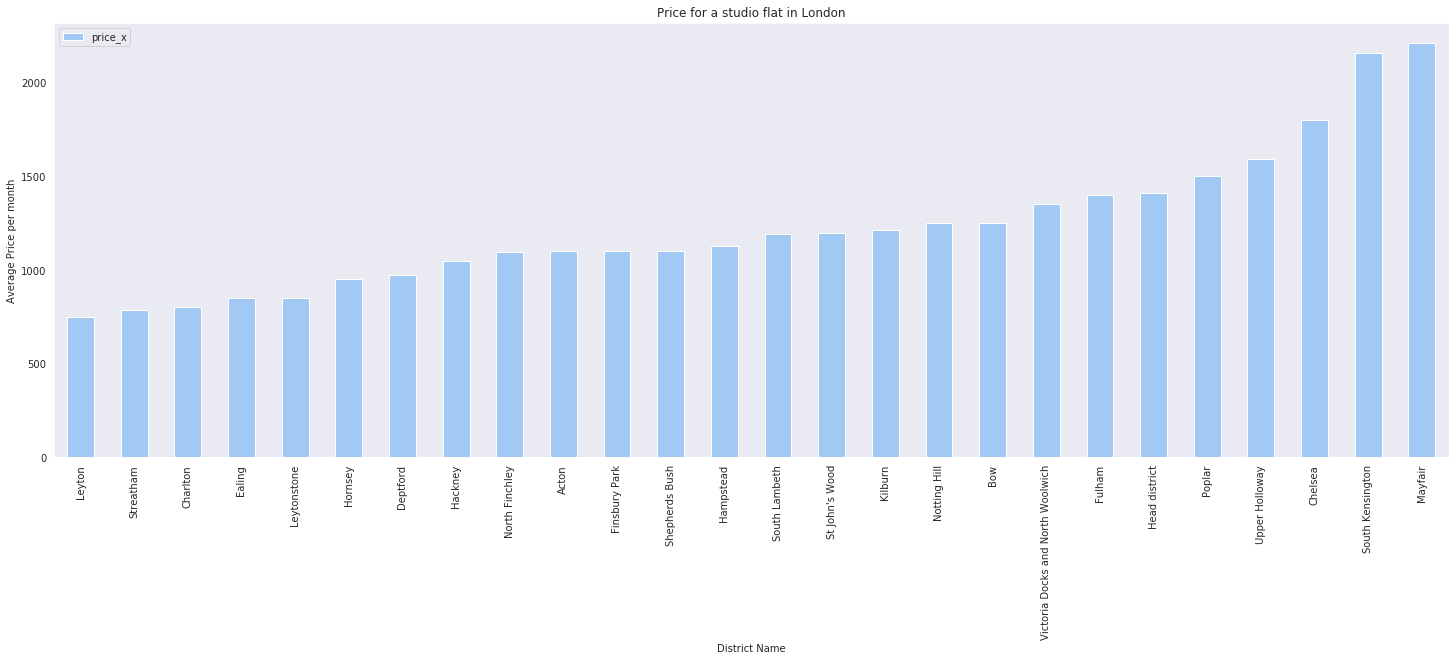

In [91]:
import matplotlib.pyplot as plt
df_studio_flat.plot('District Name', 'price_x', kind='bar', figsize=(25,8))

plt.xlabel('District Name')
plt.ylabel("Average Price per month")
plt.title("Price for a studio flat in London")
plt.savefig('Studio Flat_District.png', dpi=300, bbox_inches='tight')
plt.show()

In [75]:
df_1bed = clusters_grouped.reset_index()

In [76]:
df_1bed = df_1bed.loc[df_1bed['number_bedrooms'] == 1]

In [77]:
df_1bed = df_1bed.groupby(['District Name']).mean()

In [78]:
df_1bed = df_1bed.reset_index()
df_1bed.sort_values(by='price_x', inplace = True)

### Average price for a 1 bedroom flat by district

In [79]:
print("The standard deviation of the price of a 1 bedroom flat in London is ", 
      df_1bed["price_x"].std(), 
      " and the average price is ", df_1bed["price_x"].mean(), ".")
print("The coefficient of variation is equal to ", (df_1bed["price_x"].std())/(df_1bed["price_x"].mean()), ".")

The standard deviation of the price of a 1 bedroom flat in London is  561.9852083897267  and the average price is  1468.281735869764 .
The coefficient of variation is equal to  0.3827502547096824 .


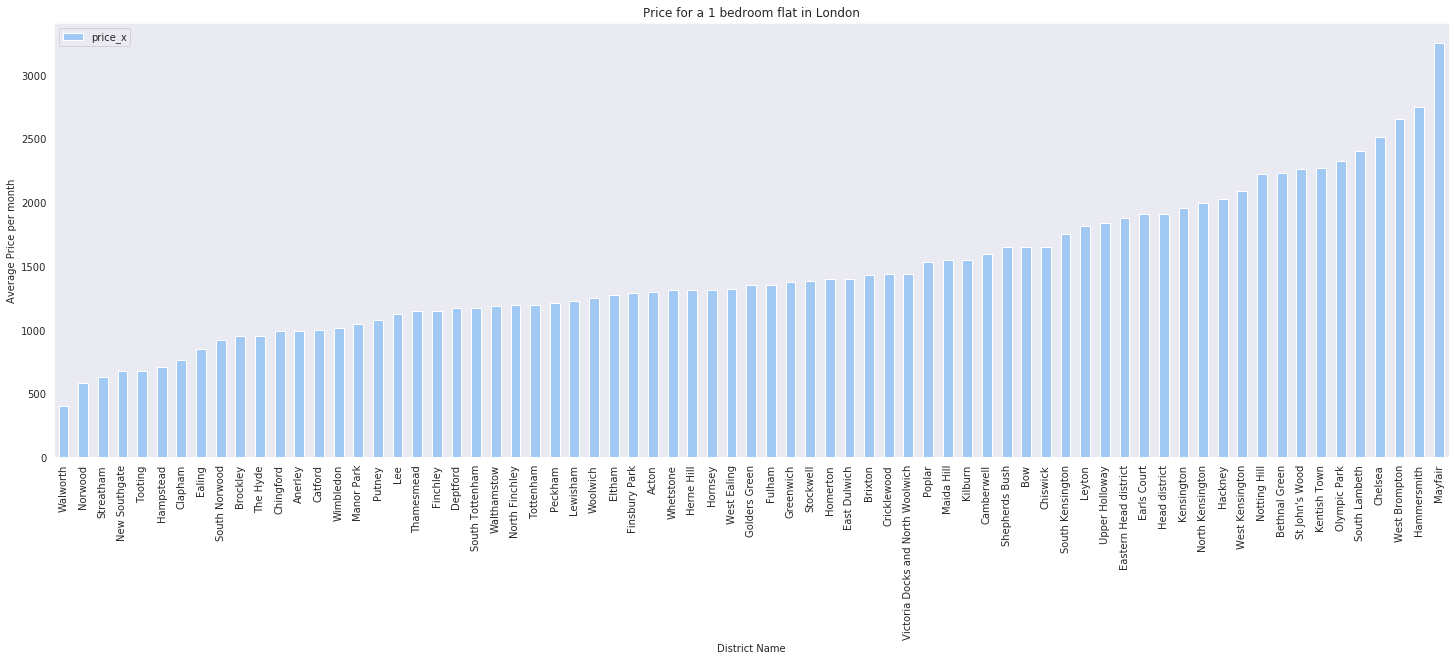

In [80]:
import matplotlib.pyplot as plt
df_1bed.plot('District Name', 'price_x', kind='bar', figsize=(25,8))

plt.xlabel('District Name')
plt.ylabel("Average Price per month")
plt.title("Price for a 1 bedroom flat in London")
plt.savefig('1bedroom Flat_District.png', dpi=300, bbox_inches='tight')
plt.show()

In [81]:
df_2bed = clusters_grouped.reset_index()

In [82]:
df_2bed = df_2bed.loc[df_2bed['number_bedrooms'] == 2]

In [83]:
df_2bed = df_2bed.groupby(['District Name']).mean()

In [84]:
df_2bed = df_2bed.reset_index()
df_2bed.sort_values(by='price_x', inplace = True)

### Average price for a 2 bedroom flat by district

In [85]:
print("The standard deviation of the price of a 2 bedroom flat in London is ", 
      df_2bed["price_x"].std(), 
      " and the average price is ", df_2bed["price_x"].mean(), ".")
print("The coefficient of variation is equal to ", (df_2bed["price_x"].std())/(df_2bed["price_x"].mean()), ".")

The standard deviation of the price of a 2 bedroom flat in London is  949.9799838984823  and the average price is  2050.9203102453102 .
The coefficient of variation is equal to  0.4631969263519826 .


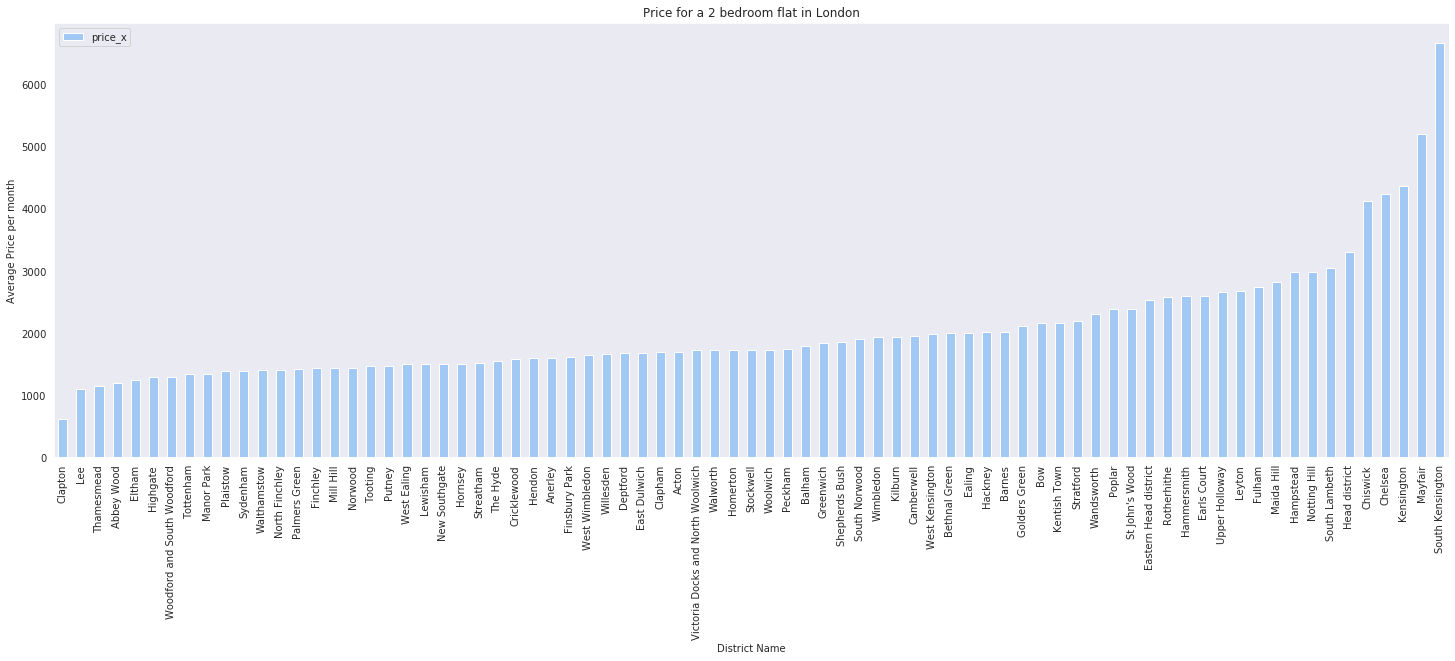

In [86]:
import matplotlib.pyplot as plt
df_2bed.plot('District Name', 'price_x', kind='bar', figsize=(25,8))

plt.xlabel('District Name')
plt.ylabel("Average Price per month")
plt.title("Price for a 2 bedroom flat in London")
plt.savefig('2bedroom Flat_District.png', dpi=300, bbox_inches='tight')
plt.show()

### Average price for a 3 bedroom flat by district

In [89]:
print("The standard deviation of the price of a 3 bedroom flat in London is ", 
      df_3bed["price_x"].std(), 
      " and the average price is ", df_3bed["price_x"].mean(), ".")
print("The coefficient of variation is equal to ", (df_3bed["price_x"].std())/(df_3bed["price_x"].mean()), ".")

The standard deviation of the price of a 3 bedroom flat in London is  2449.1497676556405  and the average price is  2892.6569311835706 .
The coefficient of variation is equal to  0.8466782705039055 .


In [98]:
df_3bed = clusters_grouped.reset_index()
df_3bed = df_3bed.loc[df_3bed['number_bedrooms'] == 3]
df_3bed = df_3bed.groupby(['District Name']).mean()
df_3bed = df_3bed.reset_index()
df_3bed.sort_values(by='price_x', inplace = True)

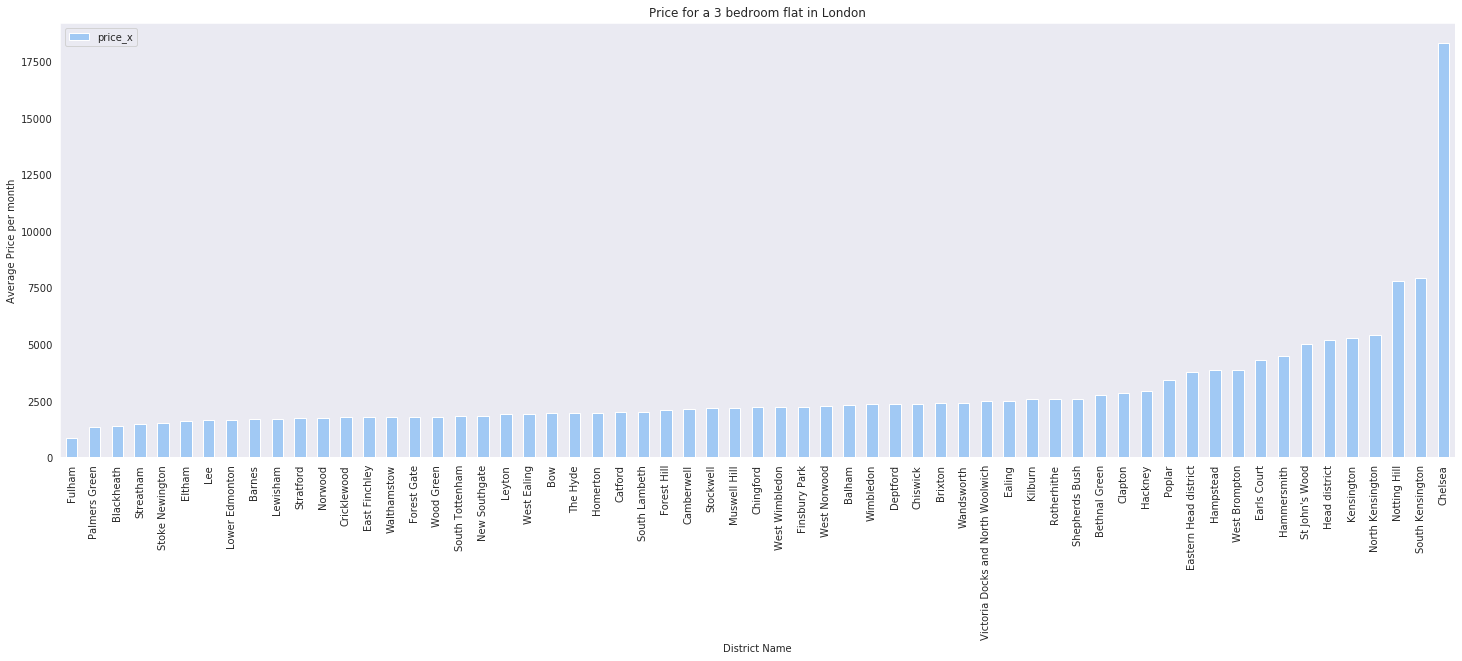

In [99]:
import matplotlib.pyplot as plt
df_3bed.plot('District Name', 'price_x', kind='bar', figsize=(25,8))

plt.xlabel('District Name')
plt.ylabel("Average Price per month")
plt.title("Price for a 3 bedroom flat in London")
plt.savefig('3bedroom Flat_District.png', dpi=300, bbox_inches='tight')
plt.show()

### Average price for a 4 bedroom flat by district

In [110]:
print("The standard deviation of the price of a 4 bedroom flat in London is ", 
      df_4bed["price_x"].std(), 
      " and the average price is ", df_4bed["price_x"].mean(), ".")
print("The coefficient of variation is equal to ", (df_4bed["price_x"].std())/(df_4bed["price_x"].mean()), ".")

The standard deviation of the price of a 4 bedroom flat in London is  5176.529461262666  and the average price is  4891.59649122807 .
The coefficient of variation is equal to  1.0582494836901524 .


In [109]:
df_4bed = clusters_grouped.reset_index()
df_4bed = df_4bed.loc[df_4bed['number_bedrooms'] == 4]
df_4bed = df_4bed.groupby(['District Name']).mean()
df_4bed = df_4bed.reset_index()
df_4bed.sort_values(by='price_x', inplace = True)

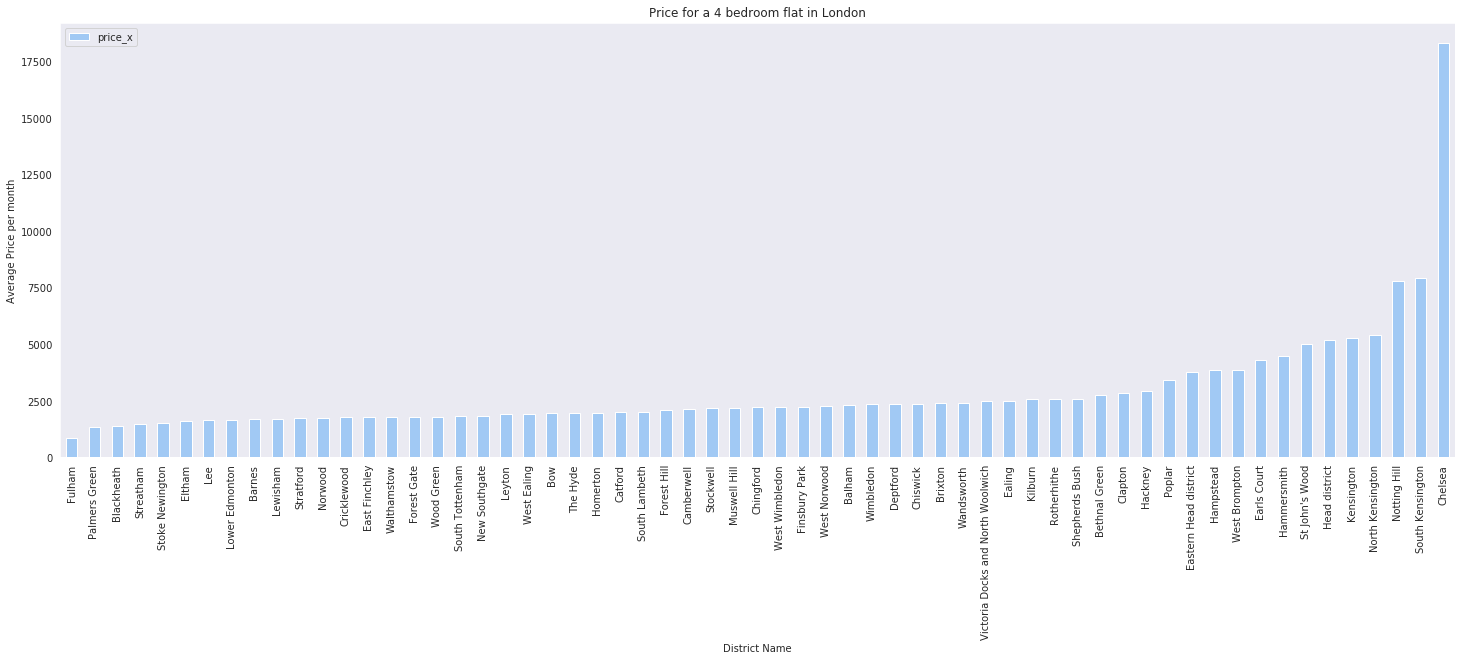

In [111]:
import matplotlib.pyplot as plt
df_3bed.plot('District Name', 'price_x', kind='bar', figsize=(25,8))

plt.xlabel('District Name')
plt.ylabel("Average Price per month")
plt.title("Price for a 4 bedroom flat in London")
plt.savefig('4bedroom Flat_District.png', dpi=300, bbox_inches='tight')
plt.show()

## Tendency of the price by number of bedrooms

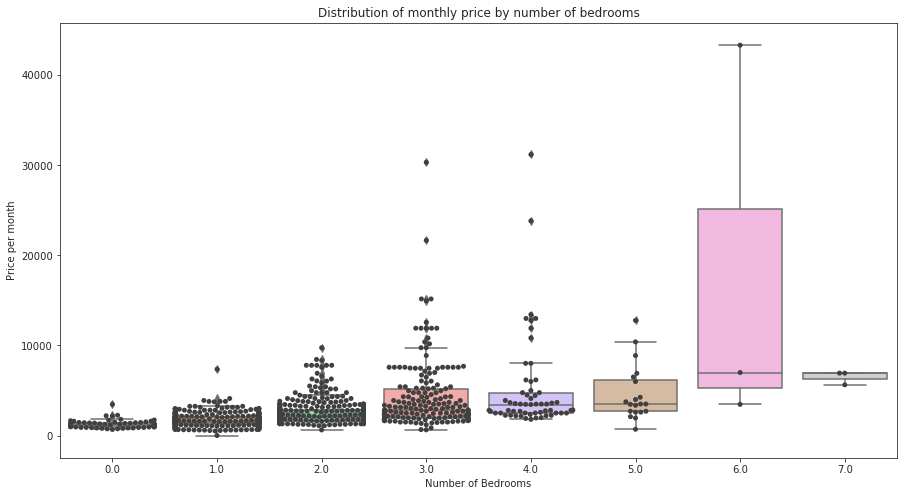

In [123]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="number_bedrooms", y=df_final_clean["price_x"], data=df_final_clean)
ax = sns.swarmplot(x="number_bedrooms", y=df_final_clean["price_x"], data=df_final_clean, color=".25")
ax.set(xlabel='Number of Bedrooms', ylabel='Price per month', title="Distribution of monthly price by number of bedrooms")
plt.savefig('BoxPlot_price_bedrooms.png', dpi=300, bbox_inches='tight')

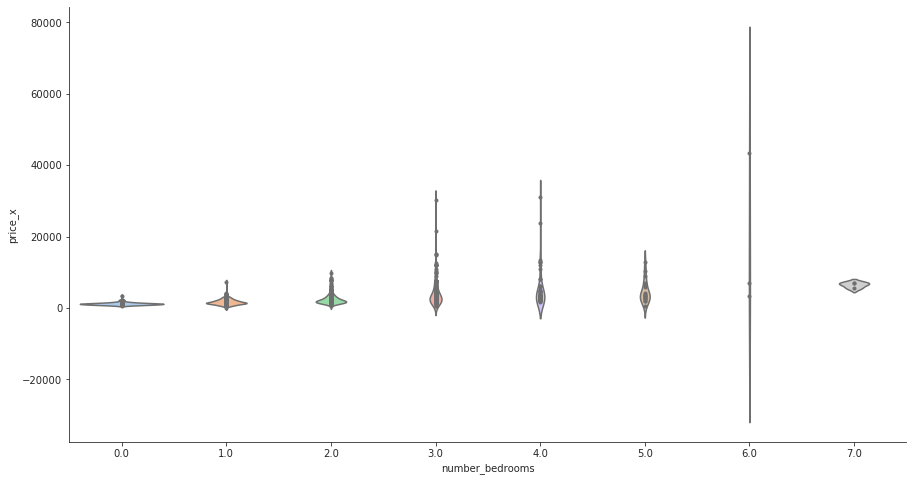

In [122]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)
sns.violinplot(x="number_bedrooms", y=df_final_clean["price_x"], data=df_final_clean, inner="points", ax=ax)    
sns.despine()

In [116]:
df_final_clean.head(1)

,price_x,type_x,address_x,url,agent_url,number_bedrooms,District Name,Latitude,Longitude,Latitude_a,Longitude_a,county,Postcode_complete,suburb,Cluster Label,address,price_y,type_y,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,5265,3 bedroom maisonette,"Abingdon Road, High Street Kensington, London W8",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,3.0,Kensington,51.507322,-0.127647,51.5016,-0.2133,NaN,W8,NaN,2,"Abingdon Road, High Street Kensington, London W8",5265,3 bedroom maisonette,Hotel,Gym / Fitness Center,Garden,Bike Rental / Bike Share,Gastropub,Middle Eastern Restaurant,Train Station,Café,Gym,Grocery Store,Park,Tennis Court,Farmers Market,Shopping Mall,Bar,Tailor Shop,Breakfast Spot,Outdoor Sculpture,Supermarket,Movie Theater


### Amount of offers by cluster

Some of them are pretty unique.

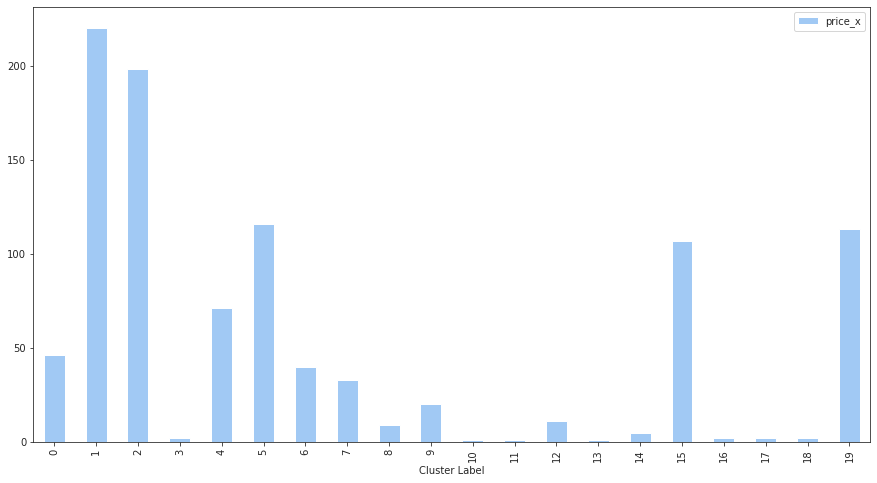

In [124]:
df_plot1 = df_final_clean.groupby(['Cluster Label']).count()

df_plot1.reset_index().plot(x="Cluster Label", y="price_x", kind="bar", figsize=(15,8))

### Correlation matrix

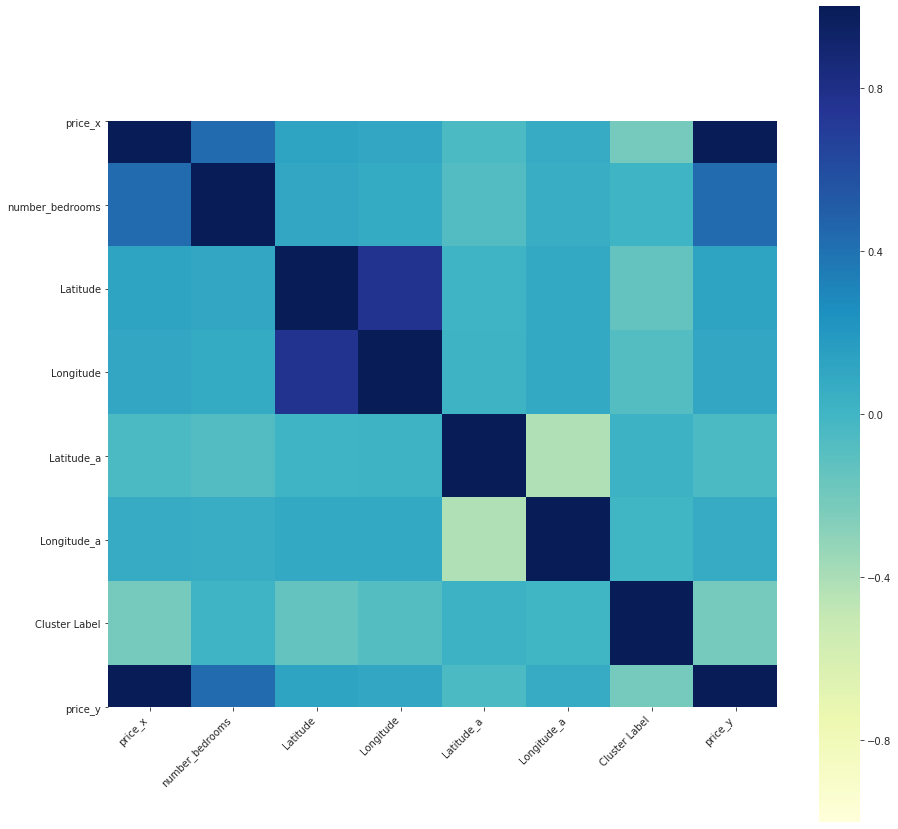

In [125]:
from matplotlib import pyplot

corr = df_final_clean.corr()

plt.figure(figsize=(15,15))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    cmap="YlGnBu",
    square=True
    
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig('CorrelationMatrix.png', dpi=300, bbox_inches='tight')

As expected, the only thing we can understand using the correlation matrix is that there is a correlation between price and the number of bedrooms.

<a id='item12'></a>

## The Final Input: find your best offer!

#### Find the flats available on the market with the neighbourhood you desire

As a starting point for this last section of the Notebook, we are going to load the K-Means model (it's necessary if it has been developed in a different Notebook), ask to the user to insert __a location__ he would love to live in, __the range of price__ and the __number of rooms__ he/she is looking for.  
  
With the data submitted by the user, we are going to __analyze the neighbor he/she is looking for__ and predict the cluster it belongs to.  
Based on these information, we can __provide a list of the best opportunities on the market__.

In [126]:
k_clusters_fit = pickle.load(open("k_clusters_fit.pkl", "rb"))
df_dcategories_nn = pd.read_csv('df_dcategries_nn.csv')

In [127]:
address = input('Insert your address')
bedroom = input('How many badrooms are you looking for?')
price = input("What's your budget?")

Insert your address 45 Park LnMayfair, London W1K 1PN
How many badrooms are you looking for? 2
What's your budget? 4000


Find the venues around the address as a sample.

In [128]:
key = 'YOUR KEY HERE'
geocoder = OpenCageGeocode(key)

query = u'{}'.format(address)
results = geocoder.geocode(query)

latitude = results[0]['geometry']['lat']
longitude = results[0]['geometry']['lng']

print(u'%f;%f;%s;%s' % (results[0]['geometry']['lat'], 
                        results[0]['geometry']['lng'],
                        results[0]['components']['country_code'],
                        results[0]['annotations']['timezone']['name']))

51.506383;-0.151600;gb;Europe/London


In [129]:
df_your_location = pd.DataFrame(columns = ['address', 'latitude', 'longitude', 'number bedrooms'])
df_your_location = df_your_location.append(pd.Series([address, latitude, longitude, int(bedroom)], index=df_your_location.columns), ignore_index = True)

In [130]:
columns_list = df_dcategories_nn.columns
columns_list = columns_list.tolist()

In [131]:
CLIENT_ID = 'YOUR CLIENT ID HERE' # your Foursquare ID
CLIENT_SECRET = 'YOUR SECRET KEY HERE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B5KWWDFHTON23TDXFR2TXATYBJQMYXICEEJWOSTX2YIAUZIC
CLIENT_SECRET:FVZXWADC3JUKZKIMRC40LFNTRSHC51MDTVKWHF4IJMGXTDC5


In [132]:
def getNearbyVenuesExp(names, latitudes, longitudes, bedrooms, radius = 500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng, bedroom in zip(names, latitudes, longitudes, bedrooms):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        if (lat != np.nan) and (lng != np.nan):
            
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng,
                bedroom,
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['address', 
                                      'latitude', 
                                      'longitude',
                                      'bedroom',
                                      'Venue', 
                                      'Venue Latitude', 
                                      'Venue Longitude', 
                                      'Venue Category']
        else:
            continue
    
    return(nearby_venues)

In [133]:
df_address_venues = getNearbyVenuesExp(names = df_your_location['address'],
                                   latitudes = df_your_location['latitude'],
                                   longitudes = df_your_location['longitude'],
                                   bedrooms = df_your_location['number bedrooms']
                                  )

45 Park LnMayfair, London W1K 1PN


In [134]:
df_address_venues.groupby(['address', 'bedroom']).count()

,,latitude,longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
address,bedroom,,,,,,
"45 Park LnMayfair, London W1K 1PN",2,100,100,100,100,100,100


In [135]:
# one hot encoding
df_venues_dummies = pd.get_dummies(df_address_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
df_venues_dummies['address'] = df_address_venues['address']
df_venues_dummies['bedroom'] = df_address_venues['bedroom']

# move address column to the first column
temp_address = df_venues_dummies['address']
df_venues_dummies.drop(labels=['address'], axis=1,inplace = True)
df_venues_dummies.insert(0, 'address', temp_address)

# move bedroom column to the second column
temp_i = df_venues_dummies['bedroom']
df_venues_dummies.drop(labels=['bedroom'], axis=1,inplace = True)
df_venues_dummies.insert(1, 'bedroom', temp_i)


df_dcategories = df_venues_dummies.groupby(['address', 'bedroom']).mean().reset_index()
df_dcategories.head()

,address,bedroom,American Restaurant,Bar,Boutique,Café,Casino,Chinese Restaurant,Club House,Cocktail Bar,Coffee Shop,English Restaurant,French Restaurant,Garden,Gym,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Lounge,Mexican Restaurant,Modern European Restaurant,Movie Theater,Museum,Park,Plaza,Pub,Restaurant,Roof Deck,Sculpture Garden,Seafood Restaurant,Shoe Store,Skating Rink,Smoke Shop,Social Club,Souvenir Shop,Spa,Steakhouse,Tapas Restaurant,Tea Room,Theme Park Ride / Attraction,Turkish Restaurant
0,"45 Park LnMayfair, London W1K 1PN",2,0.02,0.02,0.01,0.04,0.01,0.02,0.01,0.06,0.02,0.01,0.04,0.01,0.01,0.01,0.01,0.15,0.02,0.02,0.04,0.02,0.01,0.01,0.01,0.01,0.04,0.01,0.01,0.01,0.01,0.01,0.02,0.03,0.05,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.02,0.02,0.01,0.04,0.01,0.02


In [136]:
# Create a dataframe with the top 20 venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [137]:
num_top_venues = 20

if num_top_venues <= (len(df_dcategories.columns) - 2):
    num_top_venues = num_top_venues
else:
    num_top_venues = (len(df_dcategories.columns) - 2)

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['address', 'bedroom']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
address_venues_sorted = pd.DataFrame(columns=columns)
address_venues_sorted['address'] = df_dcategories['address']
address_venues_sorted['bedroom'] = df_dcategories['bedroom']

for ind in np.arange(df_dcategories.shape[0]):
    address_venues_sorted.iloc[ind, 2:] = return_most_common_venues(df_dcategories.iloc[ind, 1:], num_top_venues)

address_venues_sorted.head()

,address,bedroom,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,"45 Park LnMayfair, London W1K 1PN",2,Hotel,Cocktail Bar,Restaurant,Lounge,Tea Room,Café,French Restaurant,Italian Restaurant,Pub,Turkish Restaurant,Bar,Chinese Restaurant,Coffee Shop,Hotel Bar,Indian Restaurant,Japanese Restaurant,American Restaurant,Steakhouse,Plaza,Spa


In [138]:
df_prediction = df_dcategories.drop(columns = ['address', 'bedroom'])

In order to predict the cluster the address belongs to, we need to have the same number of features.  
The following code take the list of columns of the dataset used to train the K-Means algorithm and update the records using the values we collected in relation of the address that the user has submitted.

In [139]:
df_col = {}

for col in columns_list[1:]:
    df_col[col] = 0
    
df_columns_df = pd.DataFrame.from_dict(df_col, orient = 'index')
df_columns_df = df_columns_df.transpose()

df_columns_df.update(df_prediction)
df_columns_df

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Chaat Place,Champagne Bar,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Cigkofte Place,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Quad,College Residence Hall,College Science Building,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Community College,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cricket Ground,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Iraqi Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Res

Now we can finally predict the cluster!

In [140]:
cluster_target = k_clusters_fit.predict(df_columns_df)[0]

In [141]:
cluster_target

2

And show a list of offers based on geographical preferences of the user.

In [142]:
df_final_clean.head(2)

,price_x,type_x,address_x,url,agent_url,number_bedrooms,District Name,Latitude,Longitude,Latitude_a,Longitude_a,county,Postcode_complete,suburb,Cluster Label,address,price_y,type_y,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,5265,3 bedroom maisonette,"Abingdon Road, High Street Kensington, London W8",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,3.0,Kensington,51.507322,-0.127647,51.501600,-0.213300,NaN,W8,NaN,2,"Abingdon Road, High Street Kensington, London W8",5265,3 bedroom maisonette,Hotel,Gym / Fitness Center,Garden,Bike Rental / Bike Share,Gastropub,Middle Eastern Restaurant,Train Station,Café,Gym,Grocery Store,Park,Tennis Court,Farmers Market,Shopping Mall,Bar,Tailor Shop,Breakfast Spot,Outdoor Sculpture,Supermarket,Movie Theater
1,1500,1 bedroom apartment,"Askew Road, London, W12",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,1.0,Shepherds Bush,51.507322,-0.127647,51.505232,-0.244442,London Borough of Hammersmith and Fulham,W12 9HD,Brook Green,4,"Askew Road, London, W12",1500,1 bedroom apartment,Grocery Store,Pub,Fast Food Restaurant,Hotel,Bakery,Café,Indian Restaurant,Coffee Shop,Dry Cleaner,Breakfast Spot,Fish & Chips Shop,Moroccan Restaurant,Bus Stop,Pizza Place,Chinese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Thai Restaurant,Hostel,Park


In [143]:
df_final_clean[
    (df_final_clean.number_bedrooms == float(bedroom))
    & (df_final_clean['Cluster Label'] == cluster_target)
    & (df_final_clean.price_x <= float(price))
].sort_values(by='price_x', ascending = True).drop(columns=["District Name", "Latitude", "Longitude", "address", "price_y", "type_y"])

,price_x,type_x,address_x,url,agent_url,number_bedrooms,Latitude_a,Longitude_a,county,Postcode_complete,suburb,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
512,1250,2 bedroom flat,"Oakways, Eltham, SE9",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.450443,0.066248,Royal Borough of Greenwich,NaN,Avery Hill,2,Motorcycle Shop,Indian Restaurant,Campground,Zoo Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Fabric Shop,Food & Drink Shop,Food Court,Food Stand
655,1300,2 bedroom terraced house,"London, London, E13",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.489334,-0.144055,London,NaN,NaN,2,Hotel,Café,Pub,Italian Restaurant,Turkish Restaurant,Coffee Shop,Grocery Store,Mediterranean Restaurant,Pizza Place,Bakery,Deli / Bodega,Modern European Restaurant,Park,Beer Bar,Sandwich Place,Speakeasy,Market,Tour Provider,French Restaurant,Gastropub
799,1350,2 bedroom flat,"Talbot Court, Blackbird Hill, London, NW9",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.586400,-0.245800,NaN,NW9,NaN,2,Asian Restaurant,Hotel,Bus Stop,Pub,Supermarket,Sushi Restaurant,Sporting Goods Shop,Hookah Bar,Ice Cream Shop,Coffee Shop,Café,Field,Film Studio,Filipino Restaurant,Farmers Market,Fast Food Restaurant,Farm,Falafel Restaurant,Factory,Fish & Chips Shop
688,1400,2 bedroom flat,"Westferry Road, London",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.504225,-0.025378,London Borough of Tower Hamlets,E14 4BG,Isle of Dogs,2,Sandwich Place,Hotel,Coffee Shop,Burger Joint,Italian Restaurant,Plaza,Shopping Mall,Restaurant,Gym / Fitness Center,Bookstore,Juice Bar,Trail,Café,Portuguese Restaurant,Bakery,Park,Grocery Store,Convenience Store,IT Services,Gym
750,1517,2 bedroom apartment,"Westgate Apartments, London, E16",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.508144,0.021591,London Borough of Newham,E16 1BJ,Canning Town,2,Hotel,Café,Chinese Restaurant,Sandwich Place,Pub,Convenience Store,Coffee Shop,Bar,English Restaurant,Beach,Train Station,Harbor / Marina,Bridge,Scenic Lookout,Tapas Restaurant,Science Museum,Gym / Fitness Center,Gym,Grocery Store,Thai Restaurant
106,1600,2 bedroom flat,"Gilbert Close, London",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.471332,0.052974,Royal Borough of Greenwich,SE18 4LN,Shooters Hill,2,Restaurant,Convenience Store,Gym,Chinese Restaurant,Pet Store,Department Store,Fish Market,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Czech Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Exhibit,Flower Shop
471,1600,2 bedroom flat,"Great North Way, London, NW4",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.599427,-0.227199,London Borough of Barnet,NW4 1JB,Hendon,2,Restaurant,Rugby Pitch,Indian Restaurant,Construction & Landscaping,Auto Garage,Fish & Chips Shop,Exhibit,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Flea Market,Fish Market,Event Service,Flower Shop
731,1650,2 bedroom apartment,"Azura Court, Stratford, London",http://www.rightmove.co.uk/property-to-rent/pr...,htt

---

<a id='item13'></a>

## Conclusion

In this project, we went through the identification of a business problem and the data we need to collect in order to solve it.
In the first section of the paper, we focus on collecting the data we need. 
In the second section we focuse on data cleaning and we expand the dataset using multiple sources and API. 
After that, we developed a machine learning model to divide the market into 20 clusters by geographical similarity.

The last section is dedicated to the user, allowing him to input the address of a street where he would like to live, the number of bedrooms he needs and the price range.
This allows each user to identify the cluster that best suits their needs and empower people to filter an huge amount of data quickly.

Developing this project had been a great experiance and gave me a lot of insight of how the project could be expanded to define when a flat is overpriced or underpriced.
We could also study the real estate value based on criminality rate, location, geographical information and so on.

---

<h1 style="text-align:center;">Thank You!</h1>

---

<h2 style="text-align:left;"><img src="download.png" height="75" width="75">   Federico Sciuca</h2>
<h4 style="text-align:left;"><a href="https://www.linkedin.com/in/federico-sciuca/"><img src="https://cdn2.iconfinder.com/data/icons/popular-social-media-flat/48/Popular_Social_Media-22-512.png" style="text-align:left; position: relative; top: 15px; left: 1px;" height="45" width="45">   Contact me on LinkedIn</a></h4>

---